# Imports

In [12]:
from fastbook import *
from fastai.vision.widgets import *

In [13]:
clothing_types = 'socks','t_shirt','jeans','sweatshirt','skirt','dress','chemise de travail','suits clothes','shoes','polo shirts','jacket'
path = Path('clothing')

# Data Block API

In [23]:
clothing = DataBlock(
    #types for the independent and dependent variables
    blocks=(ImageBlock, CategoryBlock), 
    #returns a list of all the images in the path (it takes a path as argument)
    get_items=get_image_files, 
    #how to split the dataset: 20% validation set, 80% training set. Split randomly
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    #how to create the labels for the dependent variable
    get_y=parent_label,
    # resizing the images to the same size
    item_tfms=Resize(224, ResizeMethod.Crop),
    #adding data augmentation
    batch_tfms=aug_transforms())

It gives a datablock object that we will use to create a dataloader.

In [24]:
#A DataLoaders includes validation and training DataLoaders. 
#DataLoader is a class that provides batches of a few items at a time to the GPU (64 items).
dls = clothing.dataloaders(path)

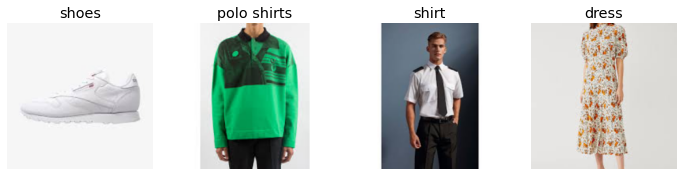

In [25]:
#showing a few items of our validation dataloader
dls.valid.show_batch(max_n=4, nrows=1)

In order to clean our data, we will first fit a convolutional neural network to the images, then have a look at the top losses.

In [26]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.297177,0.718703,0.247059,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.982300,0.570861,0.180392,00:06
1,0.790634,0.553571,0.164706,00:06
2,0.608848,0.461606,0.149020,00:06
3,0.457870,0.408425,0.129412,00:07
4,0.371401,0.396039,0.121569,00:06


# Data Cleaning using ClassificationInterpretation

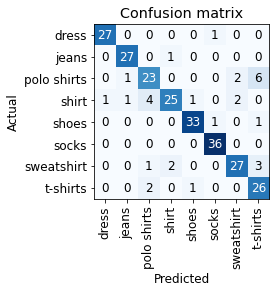

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

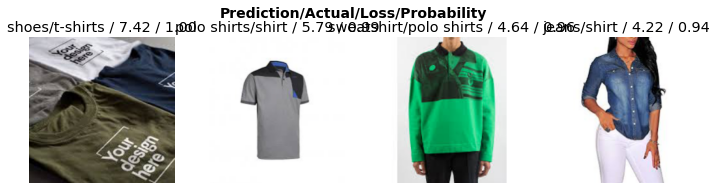

In [28]:
#plot_top_losses shows us the images with the highest loss in our dataset.
interp.plot_top_losses(4, nrows=1)

# ImageClassifierCleaner GUI

This GUI allows us to check the highest-loss images and to decide whether if we should delete them or change their labels.

In [29]:
#display highest loss for each catgeory
cleaner = ImageClassifierCleaner(learn)
cleaner

In [41]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()